# XGBOOST MODEL


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import shap

In [50]:
data = pd.read_csv('/Users/carokluin/Documents/CSM/MLFQS/ML4QS/Python3Code/datasets/acceleration_witout_g.csv')


In [51]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_set.head()

In [52]:
# Select features and target
features = ['Linear Acceleration x (m/s^2)','Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)']  


X_train = train_set[features]

y_train = train_set['Type']  # target variable

X_test = test_set[features]



In [53]:
# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [54]:
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test)

In [55]:
# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for classification
    'num_class': len(label_encoder.classes_),  # number of classes
    'eval_metric': 'mlogloss',
    'learning_rate': 0.1,
    'max_depth': 6,
    'eta': 0.3,
    'seed': 42
}

In [56]:
bst = xgb.train(params, dtrain, num_boost_round=69)

In [ ]:
# Predict on the test set
preds = bst.predict(dtest)
preds_labels = label_encoder.inverse_transform(preds.astype(int))


In [ ]:
# Print predictions
print(preds_labels)

In [ ]:
correct = preds_labels==test_set['Type']

In [ ]:
print(correct.sum()/len(correct))

In [ ]:
y_test = test_set['Type']

# Encode the test labels
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
preds_labels = label_encoder.inverse_transform(preds.astype(int))

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, preds)
precision = precision_score(y_test_encoded, preds, average='weighted')
recall = recall_score(y_test_encoded, preds, average='weighted')
f1 = f1_score(y_test_encoded, preds, average='weighted')
conf_matrix = confusion_matrix(y_test_encoded, preds)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Alternatively, print a comparison of actual vs predicted labels
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': preds_labels})
print(comparison)

In [57]:
# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(bst)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [61]:
class_names = label_encoder.classes_
print(class_names)

# Get the feature names
feature_names = X_test.columns.tolist()

['F' 'LT' 'O' 'RT' 'S']


In [59]:
# Inspect the shapes of SHAP values and features
print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)

# Inspect the first few rows of SHAP values and X_test to check for discrepancies
print("First few rows of SHAP values:", shap_values[:5])
print("First few rows of X_test:", X_test.head())

# Verify the number of features and SHAP values match
assert shap_values.shape[1] == X_test.shape[1], "Mismatch between SHAP values and features"

SHAP values shape: (4743, 4, 5)
X_test shape: (4743, 4)
First few rows of SHAP values: [[[-1.92361280e-01 -1.57176122e-01  3.76049168e-02  4.74814296e-01
   -1.92918301e-01]
  [-5.97462416e-01  1.97659552e-01  8.88462141e-02 -6.70370385e-02
   -2.30281800e-01]
  [-1.81985706e-01 -1.84678622e-02 -1.47645935e-01  2.62973178e-02
    8.02052245e-02]
  [-5.81913710e-01 -2.32302938e-02  4.22038645e-01  8.54766667e-02
   -4.62679833e-01]]

 [[-2.94302125e-02 -1.82181463e-01 -2.86463108e-02 -7.81663731e-02
    1.21838219e-01]
  [-4.79640990e-01  3.37431371e-01  1.96758240e-01  8.20906162e-02
   -4.44468558e-01]
  [ 1.22918345e-01 -1.07002325e-01 -1.32189527e-01  8.57685134e-03
    2.41703782e-02]
  [-1.21657960e-01  9.53291450e-03 -7.79251099e-01  5.48587218e-02
    2.78825700e-01]]

 [[ 1.36924848e-01 -8.28232467e-02 -1.25755578e-01 -1.23658784e-01
   -7.40770996e-02]
  [ 3.35425705e-01 -2.65451461e-01 -1.21845730e-01  2.20539510e-01
   -3.81966919e-01]
  [-3.05185169e-01 -9.16635394e-02 -1.0

['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)']


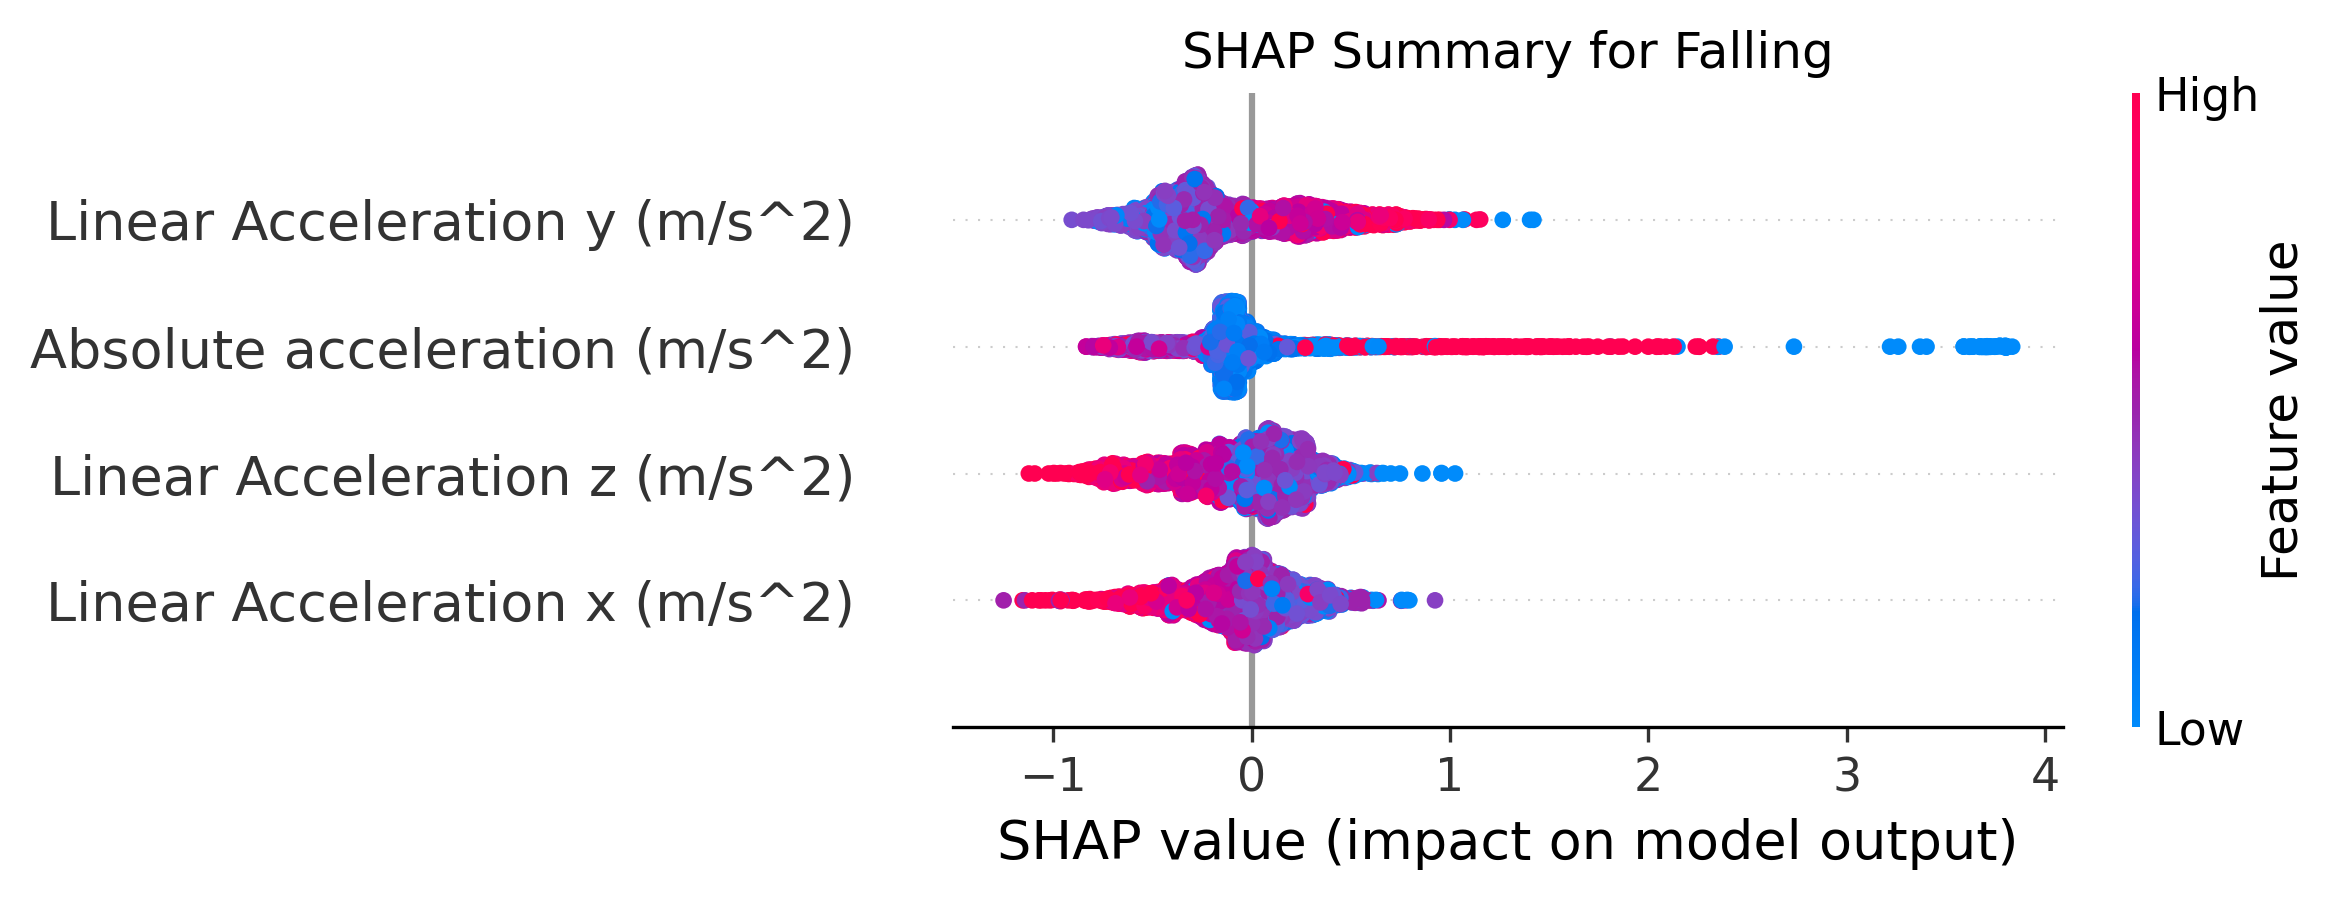

In [70]:
# Plot SHAP summary for FALLING
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Falling")
shap.summary_plot(shap_values[:, :,0], X_test, feature_names=feature_names)
plt.show()

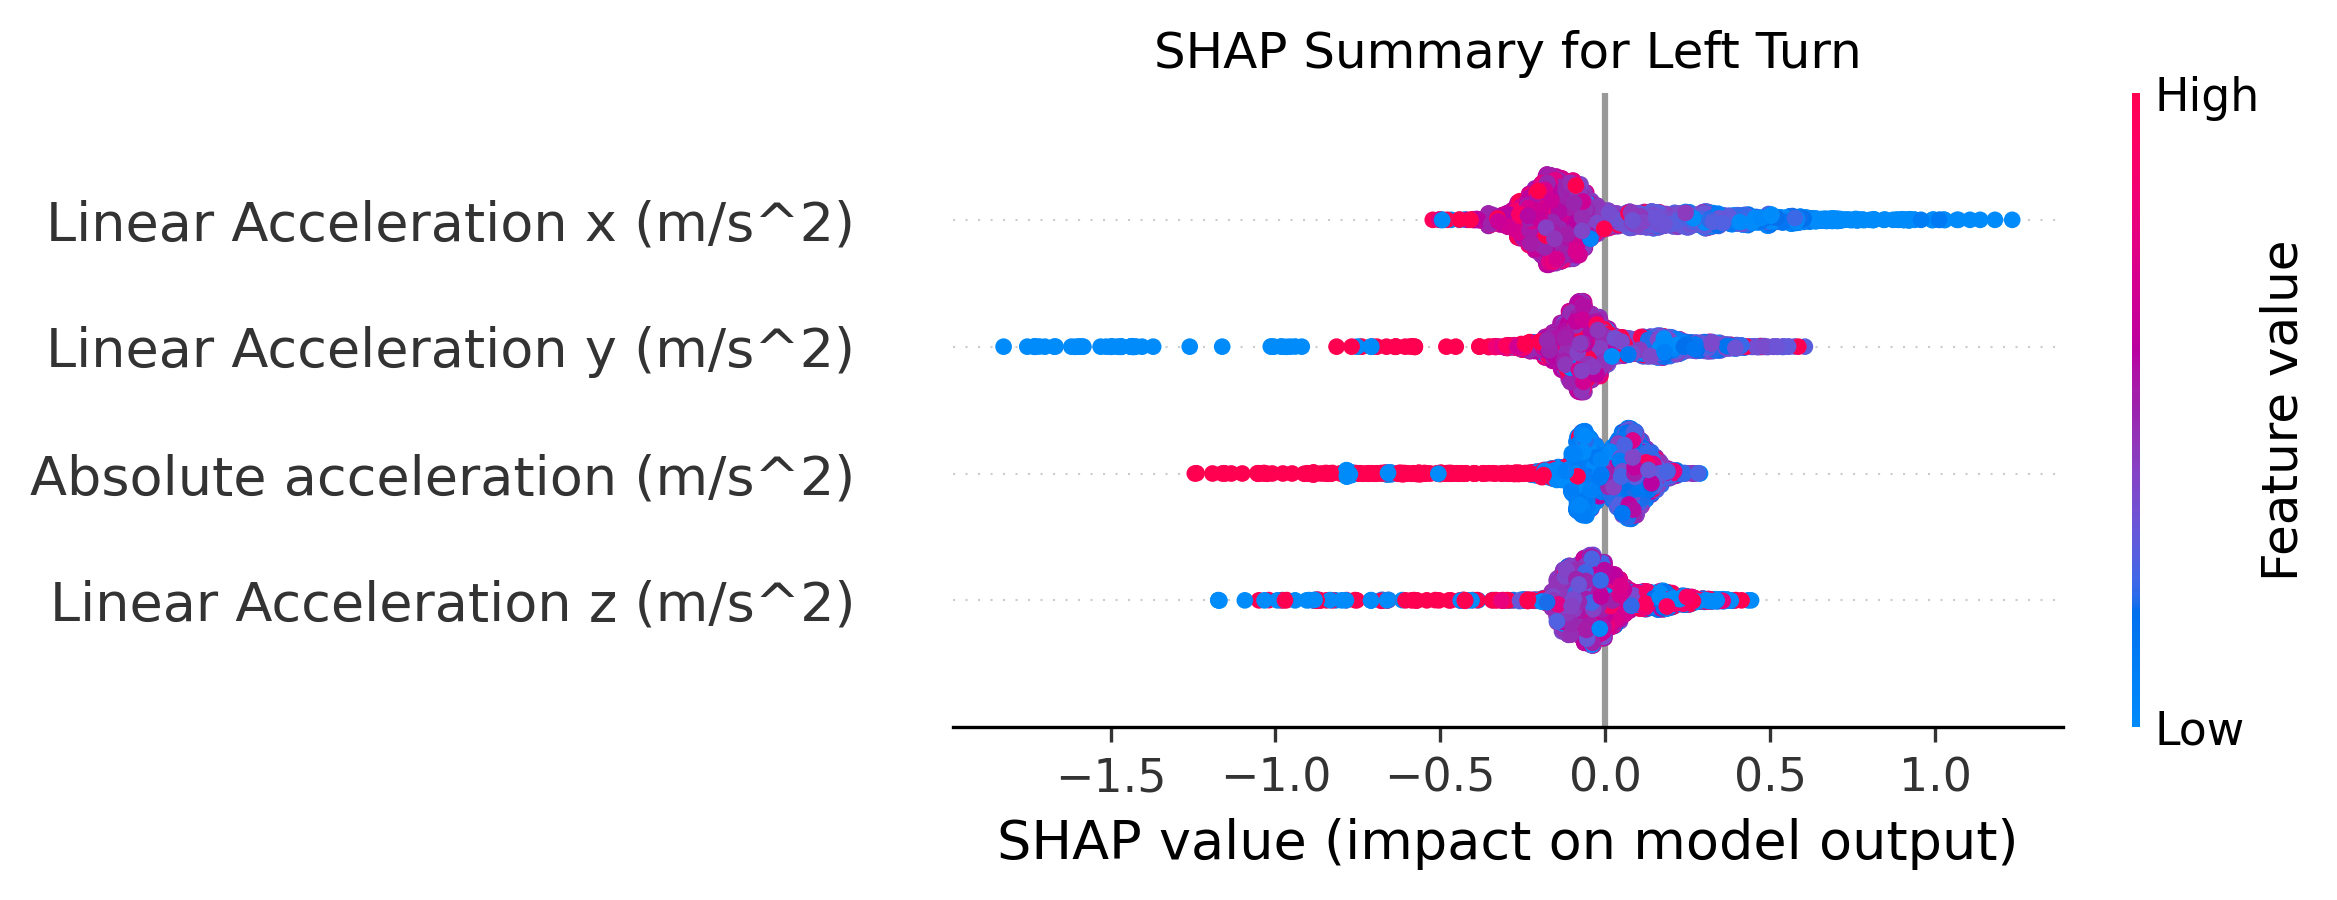

In [73]:
# Plot SHAP summary LEFT TURN 
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Left Turn")
shap.summary_plot(shap_values[:, :,1], X_test, feature_names=feature_names)
plt.show()

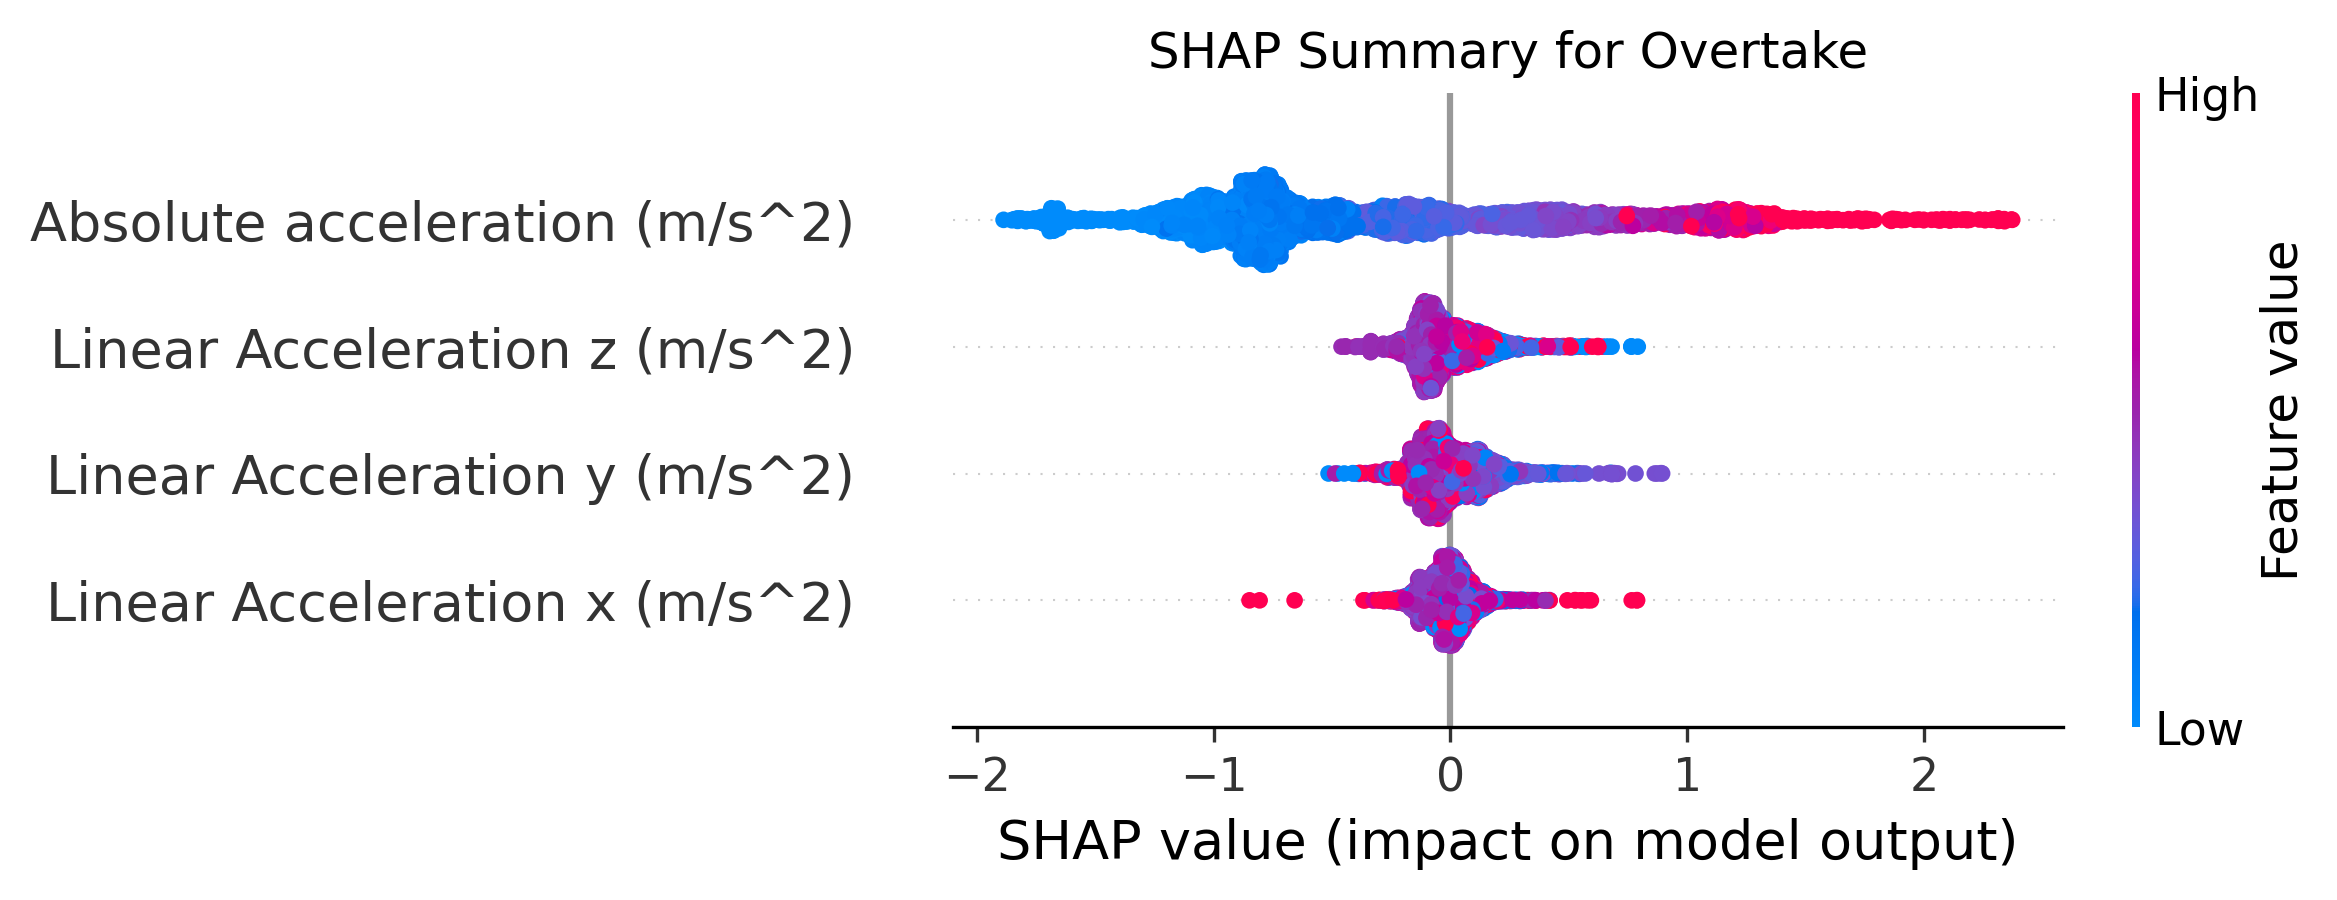

In [74]:

# Plot SHAP summary for OVERTAKE
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Overtake")
shap.summary_plot(shap_values[:, :,2], X_test, feature_names=feature_names)
plt.show()

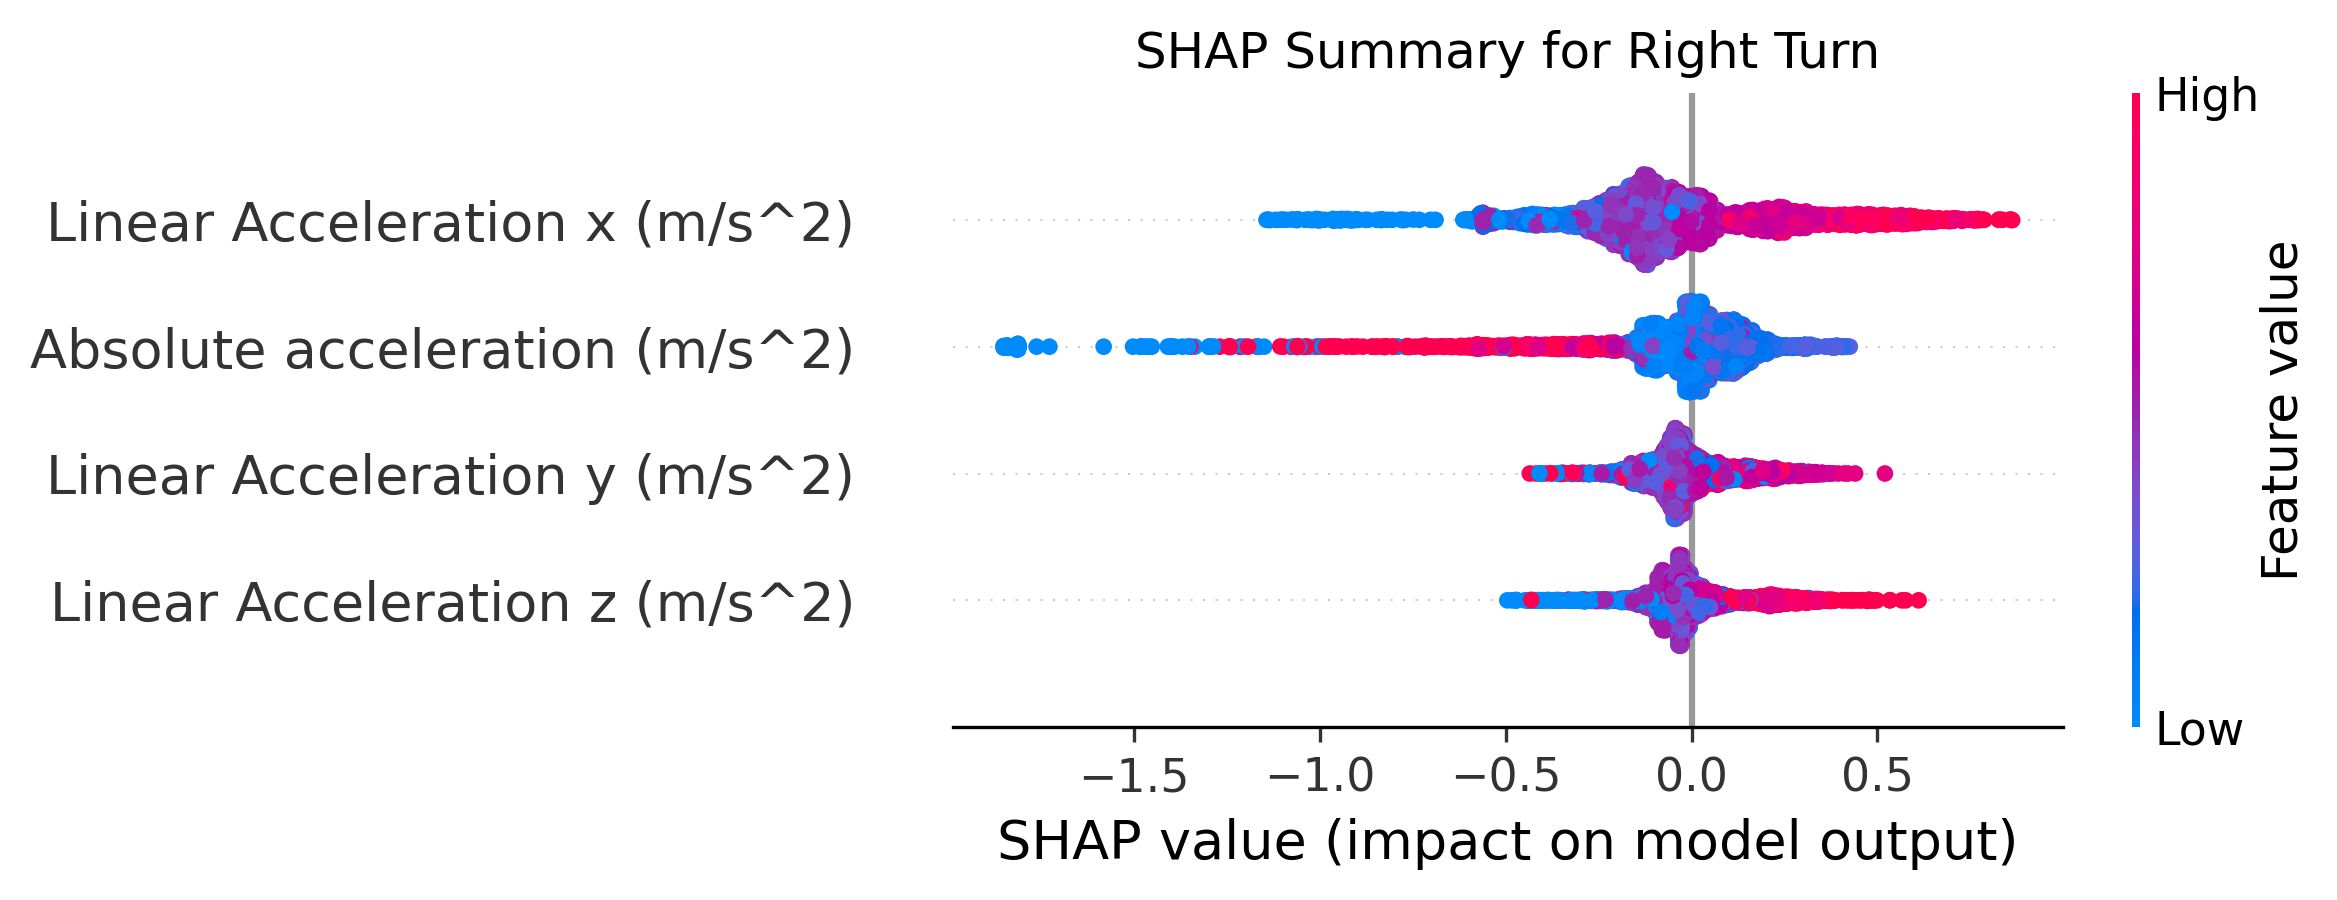

In [75]:
# Plot SHAP summary for RIGHT TURN
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Right Turn")
shap.summary_plot(shap_values[:, :,3], X_test, feature_names=feature_names)
plt.show()

['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Absolute acceleration (m/s^2)']


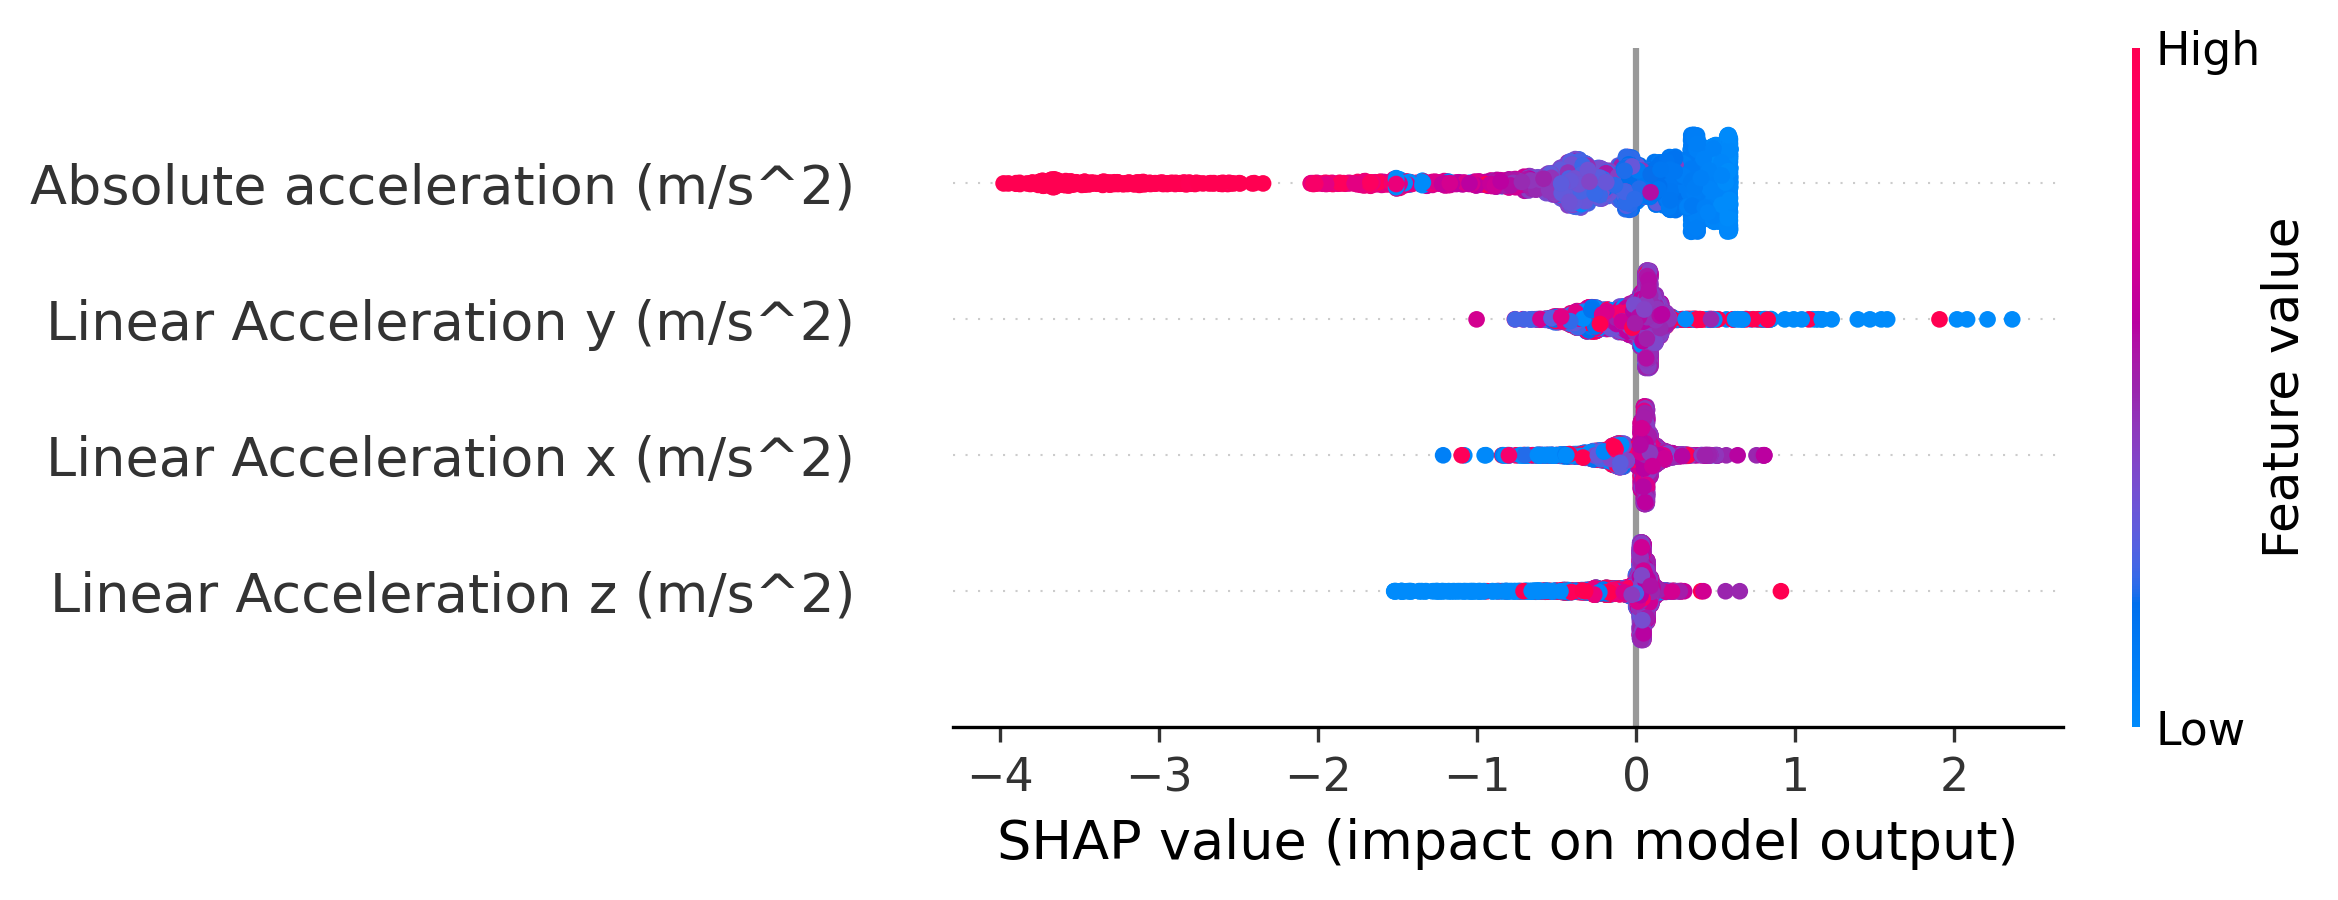

In [68]:
# Plot SHAP summary for STRAIGHT
plt.figure(figsize=(10, 6), dpi=300)
plt.title("SHAP Summary for Straight")
shap.summary_plot(shap_values[:, :,4], X_test, feature_names=feature_names)
plt.show()

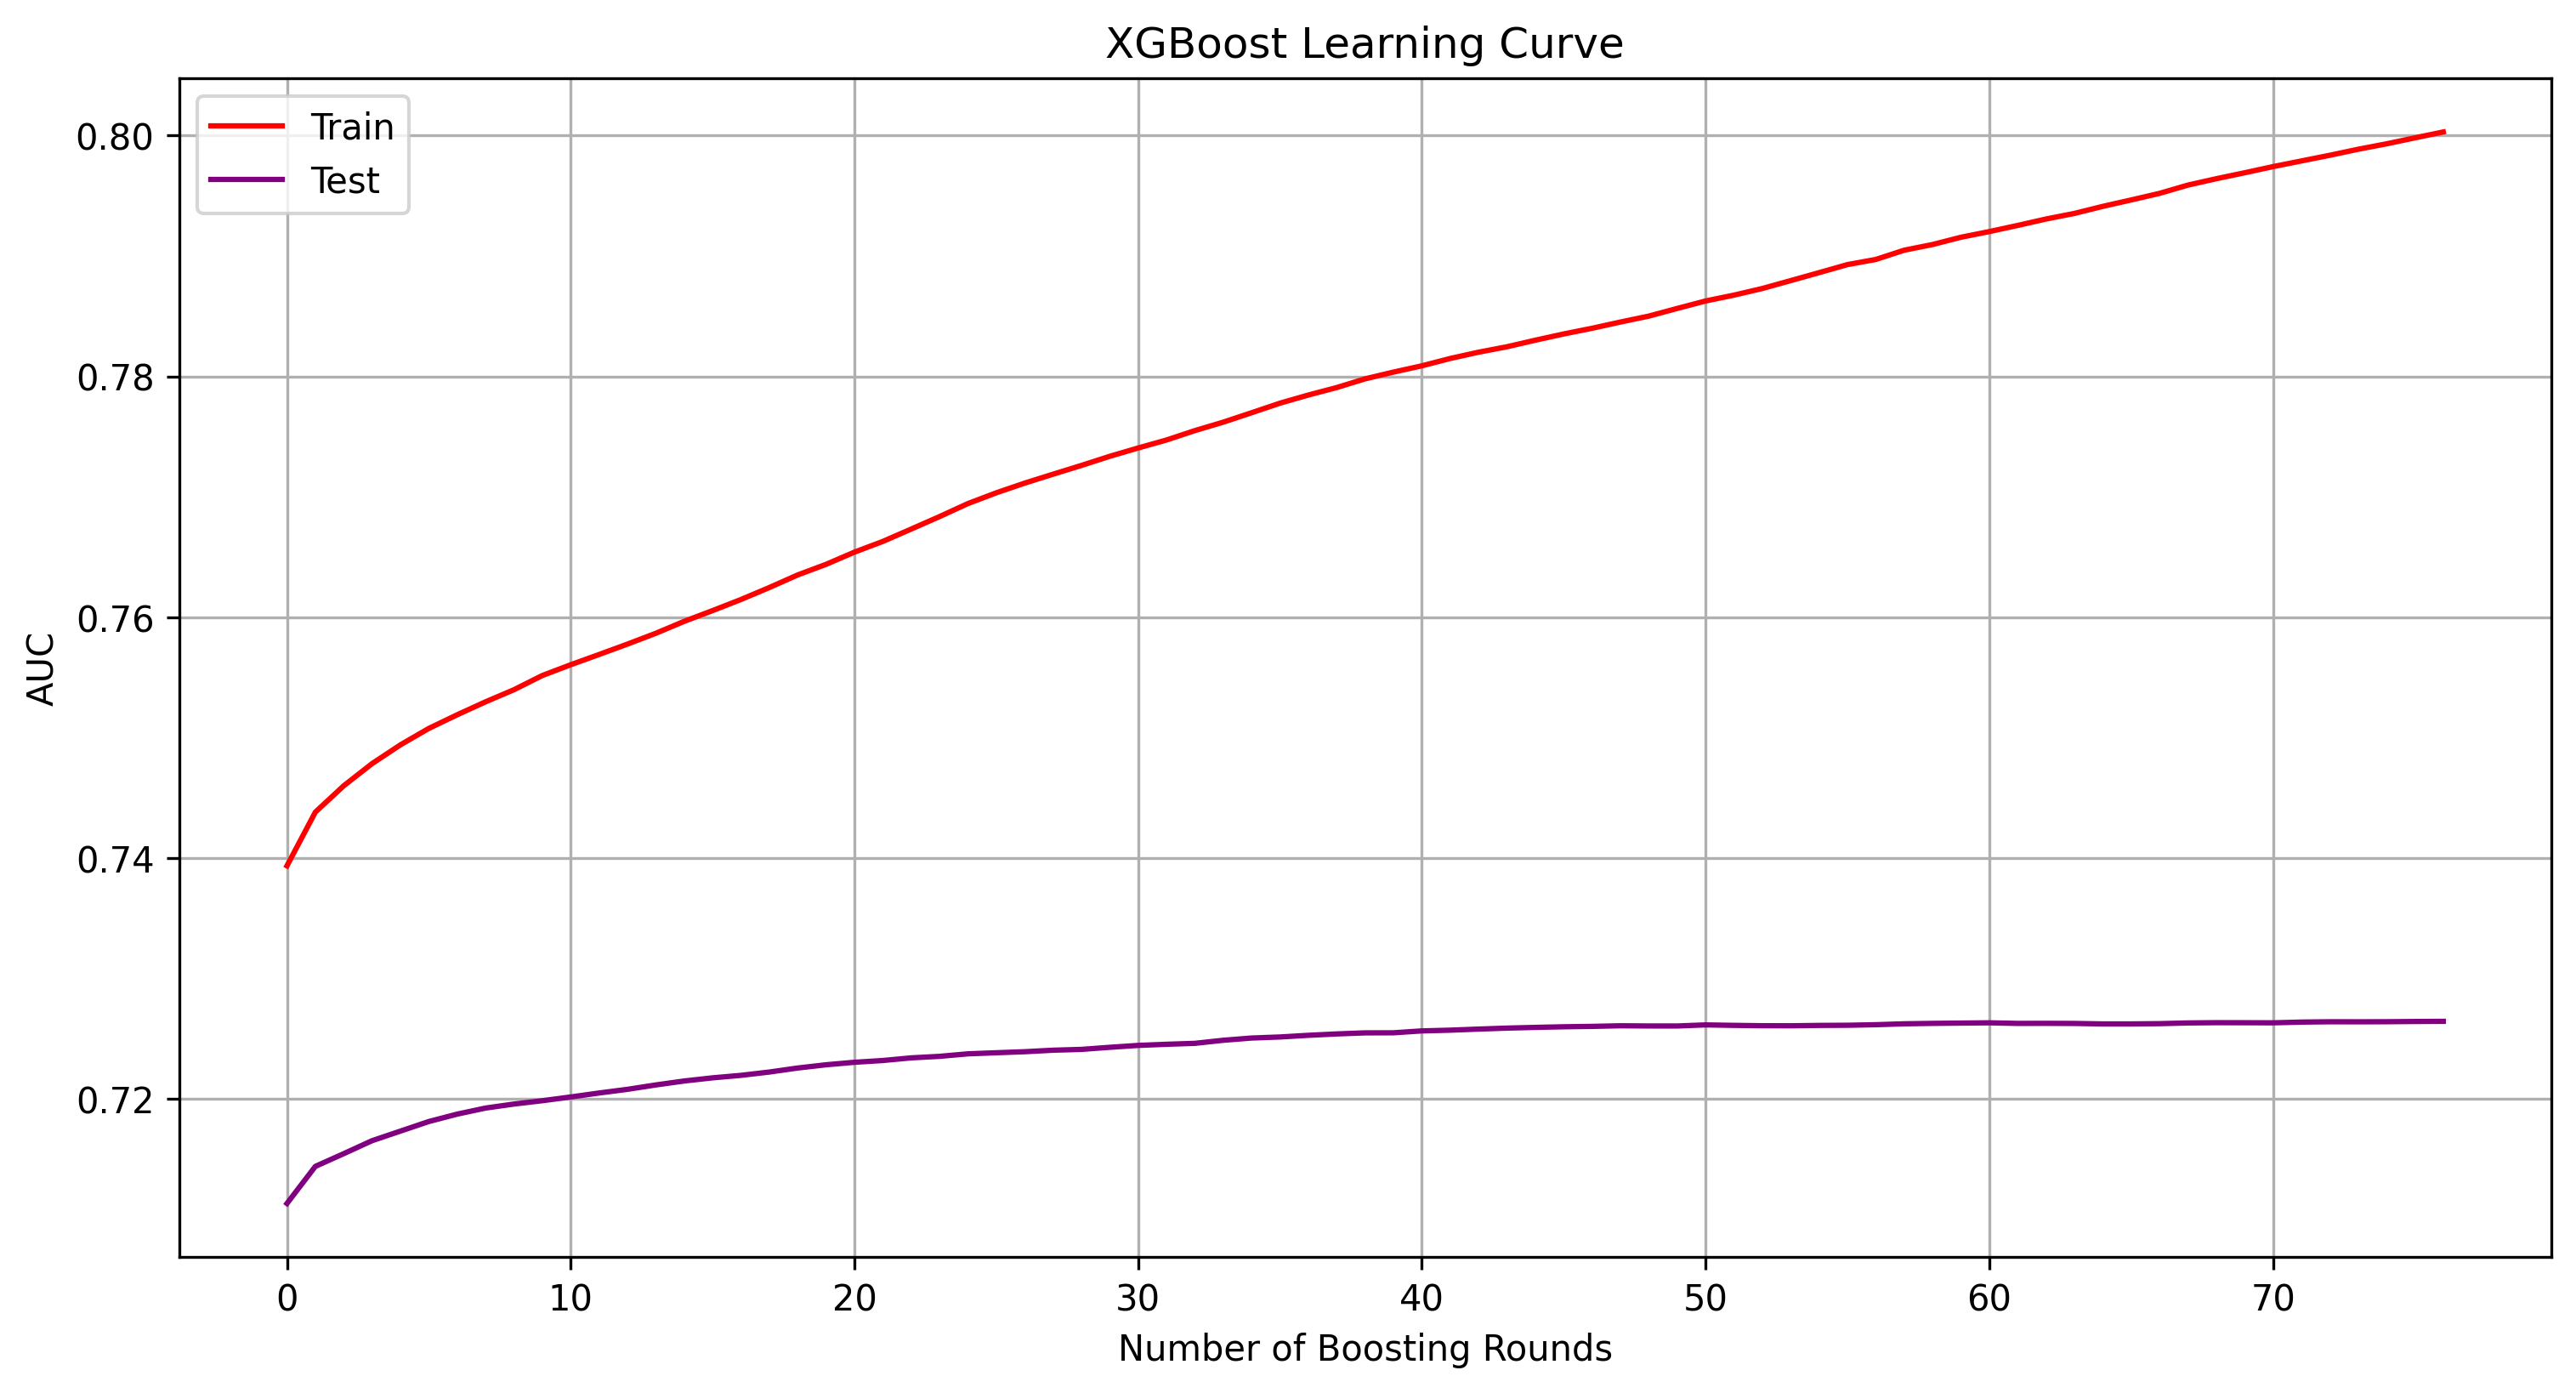

In [77]:
# Perform cross-validation and record evaluation results
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=500,
    nfold=5,
    early_stopping_rounds=50,
    metrics='auc',
    seed=42,
    shuffle=True
)

# Plot learning curves
epochs = len(cv_results)
x_axis = range(0, epochs)

plt.figure(figsize=(12, 6), dpi=300)
plt.plot(x_axis, cv_results['train-auc-mean'], label='Train', color='red')
plt.plot(x_axis, cv_results['test-auc-mean'], label='Test', color='purple')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('AUC')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

## GRID SEARCH

In [ ]:
def perform_grid_search(X_train, y_train, label_encoder):
    # Define initial parameters
    params = {
        'objective': 'multi:softmax',
        'num_class': len(label_encoder.classes_),
        'eval_metric': 'mlogloss',
        'seed': 42
    }

    # Define the parameter grid
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'max_depth': [4, 6, 8, 10],
        'eta': [0.01, 0.1, 0.2, 0.3]
    }

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier(**params)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

# Example usage:
# best_params, best_score = perform_grid_search(X_train, y_train, label_encoder)
# print(f"Best parameters found: {best_params}")
# print(f"Best cross-validation accuracy: {best_score}")
